In [15]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, explained_variance_score

In [7]:
df = pd.read_csv('../data/final_dataset_1.csv')
print(df.info)

<bound method DataFrame.info of            price  bedrooms  bathrooms  sqm_living  floors  condition  grade  \
0      204148.00         3       1.00   109.62554     1.0          3      7   
1      494960.00         3       2.25   238.76071     2.0          3      7   
2      165600.00         2       1.00    71.53531     1.0          3      6   
3      555680.00         4       3.00   182.08988     1.0          5      7   
4      469200.00         3       2.00   156.07704     1.0          3      8   
...          ...       ...        ...         ...     ...        ...    ...   
21122  331200.00         3       2.50   142.14159     3.0          3      8   
21123  368000.00         4       2.50   214.60593     2.0          3      8   
21124  369932.92         2       0.75    94.76106     2.0          3      7   
21125  368000.00         3       2.50   148.64480     2.0          3      8   
21126  299000.00         2       0.75    94.76106     2.0          3      7   

       yr_built  yr

In [9]:
#drop the rows that have over 1.2s million price
df.drop(df[df['price'] > 1200000].index, inplace = True)
print(df.info)

<bound method DataFrame.info of            price  bedrooms  bathrooms  sqm_living  floors  condition  grade  \
0      204148.00         3       1.00   109.62554     1.0          3      7   
1      494960.00         3       2.25   238.76071     2.0          3      7   
2      165600.00         2       1.00    71.53531     1.0          3      6   
3      555680.00         4       3.00   182.08988     1.0          5      7   
4      469200.00         3       2.00   156.07704     1.0          3      8   
...          ...       ...        ...         ...     ...        ...    ...   
21122  331200.00         3       2.50   142.14159     3.0          3      8   
21123  368000.00         4       2.50   214.60593     2.0          3      8   
21124  369932.92         2       0.75    94.76106     2.0          3      7   
21125  368000.00         3       2.50   148.64480     2.0          3      8   
21126  299000.00         2       0.75    94.76106     2.0          3      7   

       yr_built  yr

In [11]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [19]:
model = Sequential()

# input layer
model.add(Dense(16,activation='relu'))

# hidden layers
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [20]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247717036032.0000 - val_loss: 245601796096.0000
Epoch 2/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 238964867072.0000 - val_loss: 242046959616.0000
Epoch 3/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 233159360512.0000 - val_loss: 210903924736.0000
Epoch 4/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 188754952192.0000 - val_loss: 114003369984.0000
Epoch 5/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 85309743104.0000 - val_loss: 37374709760.0000
Epoch 6/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 33541287936.0000 - val_loss: 33384284160.0000
Epoch 7/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 32479997952.0000 - val_loss: 33043937280.0000
Epoch 8/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31799386112.0000 - val_loss: 32691343360.0000
Epoch 9/400
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 31329042432.0000 - val_loss: 32336848896.0000
Epoch 10/400
11

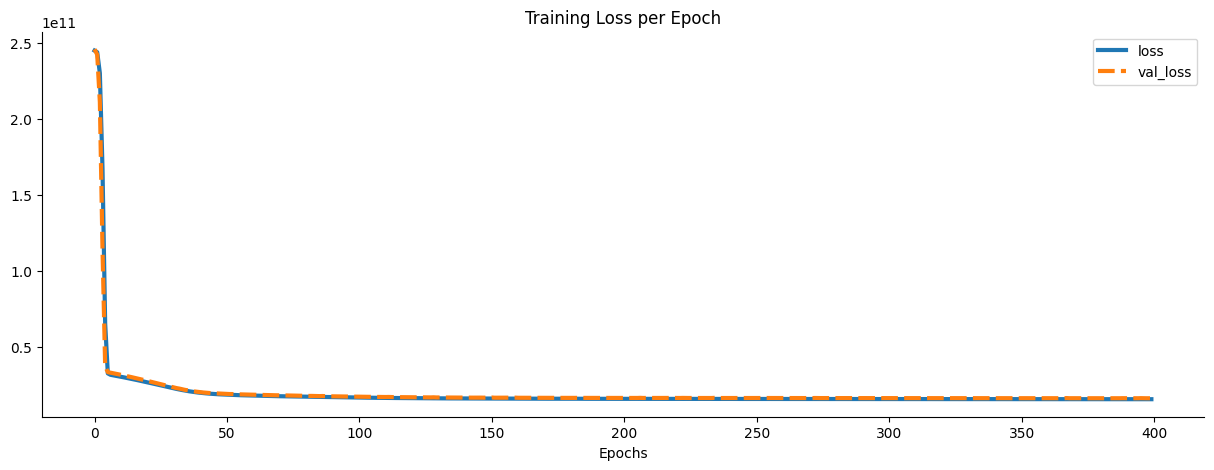

In [21]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [22]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('R^2: ',r2_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
MAE:  94599.77096208498
MSE:  16220043837.132376
RMSE:  127357.93590166408
Variance Regression Score:  0.6462485576911261
R^2:  0.6461091666576249


Descriptive Statistics:
 count    2.038000e+04
mean     4.478397e+05
std      2.107922e+05
min      7.176000e+04
25%      2.898000e+05
50%      4.038570e+05
75%      5.612000e+05
max      1.196000e+06
Name: price, dtype: float64
